<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
seaborn.set_context('talk')
seaborn.set_theme(style="ticks")


## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.   
    <font color=blue>Para estudiar los lenguajes de programación asociados a los mejores salarios se procede a elegir las columnas:__"tools_programming_lenguages", "salary_monthly_NETO" y "work_contract_type"__.</font>
    
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.

    <font color=blue>Observando los datos se pudo apreciar la existencia de valores NAN y errones, por lo que se procedio a eliminar los valores nulos y menores a 1000 que existian en la columna __"salary_monthly_NETO"__. 
para los valores extremos superiores se procedio a eliminar los superiores al percentil 99, entediendo que esto genera un sesgo debido a que los lenguajes con mejores salarios se ven mas afectados, se va a proceder a relizarlo por cada lenguaje independientemente</font>
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  
  <font color=blue>Se procedio a elegir los lenguajes en función del interes propio del grupo, basado en las experiencias de cada uno y cuales podrian ser interesantes contrastar </font>
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

### 1_Seleccion de Columnas Relevantes

In [4]:
# complete here if you want to include more columns


relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'work_contract_type', 'salary_in_usd']
neto='salary_monthly_NETO'
lenguajes='tools_programming_languages'
contrato='work_contract_type'

#not_that_revelant_columns = ['work_province', 'work_contract_type']
#print(df.columns)
# df['work_contract_type'].unique()
df.columns
# Graficar histograma sobre variables 


Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



### 2_Seleccionar las filas relevantes

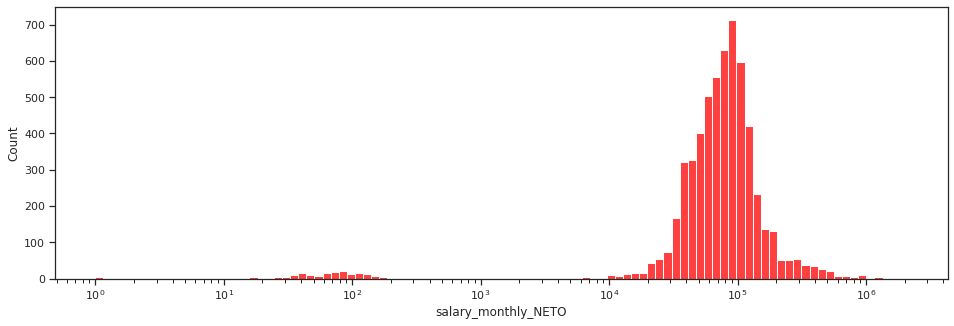

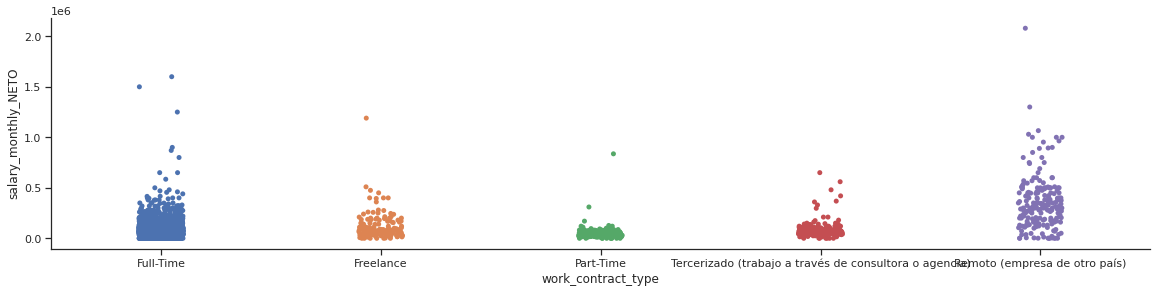

In [5]:

#df.tools_programming_languages[:3]
##Grafico en escala logaritmica donde se ve los valores errones menores a 1000
fig= plt.subplots(figsize=(16, 5))
seaborn.histplot(df[neto], bins=100, color='red',log_scale=True)  

##Grafico donde se ve que existe una diferencia de salarios en funcion del tipo de contrato, podria ser interesante estudiarlo,
##o podria ser interesante tomar una subpoblacion como por ejemplo FULL TIME
seaborn.catplot(data=df, y=neto,x=contrato, height=4,aspect=4)

In [6]:
# cuantos NaN existen en la siguiente columna
# df_lang['salary_monthly_NETO'].isnull().sum()

## clean missing values
# approach 1
df_without_null = df[df['salary_monthly_NETO'].notnull()]
# approach 2
# df_lang_without_null_2 = df['salary_monthly_NETO'].dropna()
# print(len(df_lang_without_null), len(df_lang_without_null_2))

## Punto 2
# considerando el salario minimo
# df_lang_without_null = df_lang_without_null[df_lang_without_null['salary_monthly_NETO'] > 18900]
# filtrando salarios netos mayores a mil, eliminando datos erroneos
df_without_null = df_without_null[df_without_null['salary_monthly_NETO'] > 1000]
df_without_null_percentil = df_without_null[df_without_null['salary_monthly_NETO'] <\
                                            df_without_null['salary_monthly_NETO'].quantile(0.99)]
# borrar datos por encima del percentil (0.99) en funcion de cada lenguage.


# stats
# print(df_without_null['salary_monthly_NETO'].describe())
# print(df_without_null_percentil['salary_monthly_NETO'].describe())
df_without_null_percentil

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,Hombre,32,Argentina,Provincia de Buenos Aires,13.0,0.0,3.0,0,Secundario,Completado,...,Jamás,Heterosexual,NaN,No,101-200,Servicios / Consultoría de Software / Digital,9,9,"Abono de celular, Clases de gimnasia online, C...",NaN
6089,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,10.0,3.0,0.0,0,Universitario,Completado,...,En mi trabajo actual,Heterosexual,NaN,NaN,2001-5000,Otras industrias,7,8,"Capacitaciones y/o cursos, Clases de gimnasia ...",NaN
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,6.0,6.0,0,Terciario,Completado,...,En mi trabajo actual,Heterosexual,NaN,No,501-1000,Otras industrias,7,8,Viáticos,NaN
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,5.0,5.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Otras industrias,8,10,"Abono de celular, Capacitaciones y/o cursos, D...",NaN


#### Determinación de lenguajes más populares
Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [7]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.

df = df_without_null_percentil
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

/home/cactus/.anaconda3/envs/diplodatos/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/cactus/.anaconda3/envs/diplodatos/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,programming_language,tools_programming_languages,salary_monthly_NETO,work_contract_type,salary_in_usd,cured_programming_languages
0,ninguno,Ninguno,43000.0,Full-Time,NaN,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,Full-Time,NaN,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,NaN,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,NaN,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,Full-Time,NaN,[ninguno]


#### ¿Como filtrar/contar frecuencias del indice del df?
cantidad de elementos unicos en df_lang == cantidad de programadores (df original filtrado (df_without_null_percentil))

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [8]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]
#len(language_count)

,language,frequency
0,javascript,2308
1,sql,2012
2,html,1716
3,python,1369
4,java,1363
5,css,1147
6,bash/shell,929
7,php,820
8,.net,773
9,typescript,713


#### Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [9]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
# seleccionados segun el interes del grupo en funcion del conocimiento de dominio, experiencia, etc.
interesting_languages = ["python", ".net", "java", "scala", "typescript", "go"]

#interesting_languages = ["haskell"] --->de interes pero con pocos valores para poder estudiarlo

filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,work_contract_type,salary_in_usd,cured_programming_languages
1,python,"HTML, Javascript, Python",63000.0,Full-Time,NaN,"[html, javascript, python]"
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,NaN,"[bash/shell, c, css, html, java, javascript, p..."
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,NaN,"[bash/shell, c, css, html, java, javascript, p..."
4,typescript,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Full-Time,NaN,"[css, html, javascript, sql, typescript]"
5,java,"Java, Javascript",44000.0,Full-Time,NaN,"[java, javascript]"


### ¿Mejor salario?

- salarios por encima del Q3
- [X] salarios por encima del Q2 (median)
- salarios por encima de X monto (teniendo cuenta el salario promedio argentino, quienes pagan ganancias, etc.)


### prueba con df filtrado: salarios por debajo del Q1

### 3_Seleccionar métricas 

In [10]:
# specific_lang_programmers -> cantidad de filas 
programmers = len(df)
neto_median = df[neto].median()
neto_x = 100000
programmers_over_median = len(df[df[neto] > neto_median])
programmers_over_x = len(df[df[neto] > neto_x])

print(f"cantidad de programadores: {programmers}\n")
for lang in interesting_languages:
    specific_lang_programmers = len(filtered_df_lang[filtered_df_lang['programming_language'] == lang])
    print(f"cantidad programadores de {lang}: {specific_lang_programmers}")
    prob_lang = specific_lang_programmers/programmers
    print(f'probabilidad de utilizar {lang} :{prob_lang} \n')

# probabilidad de ganar por encima de la mediana siendo programador
print(programmers_over_median/programmers)

# probabilidad de ganar por encima de X siendo programador
print(programmers_over_x/programmers)


cantidad de programadores: 5647

cantidad programadores de python: 1369
probabilidad de utilizar python :0.2424296086417567 

cantidad programadores de .net: 773
probabilidad de utilizar .net :0.13688684257127678 

cantidad programadores de java: 1363
probabilidad de utilizar java :0.24136709757393307 

cantidad programadores de scala: 104
probabilidad de utilizar scala :0.018416858508942802 

cantidad programadores de typescript: 713
probabilidad de utilizar typescript :0.12626173189304055 

cantidad programadores de go: 273
probabilidad de utilizar go :0.048344253585974856 

0.4976093500973969
0.282982114397025


## Graficos


In [11]:
# comentado por malo
#seaborn.pairplot(data=filtered_df_lang, y_vars=['salary_monthly_NETO'],
#                 x_vars=['programming_language'],
#                 aspect=2, height=4)

#plt.figure(figsize=(14, 10))
#plt.hist(filtered_df_lang[filtered_df_lang['salary_monthly_NETO'] < 30000]['salary_monthly_NETO'], color='orangered', bins=50)
#plt.show()
pd.crosstab(index=filtered_df_lang[neto]>neto_x,
            columns=filtered_df_lang['programming_language'], margins=True, normalize=True)

programming_language,.net,go,java,python,scala,typescript,All
salary_monthly_NETO,,,,,,,
False,0.121436,0.025462,0.188466,0.188466,0.008270,0.099674,0.631774
True,0.046790,0.033950,0.108161,0.109467,0.014363,0.055495,0.368226
All,0.168226,0.059412,0.296627,0.297933,0.022633,0.155169,1.000000


count     16658.000000
mean      96066.608736
std       66690.477839
min        1100.000000
25%       56000.000000
50%       80992.000000
75%      110000.000000
max      490000.000000
Name: salary_monthly_NETO, dtype: float64

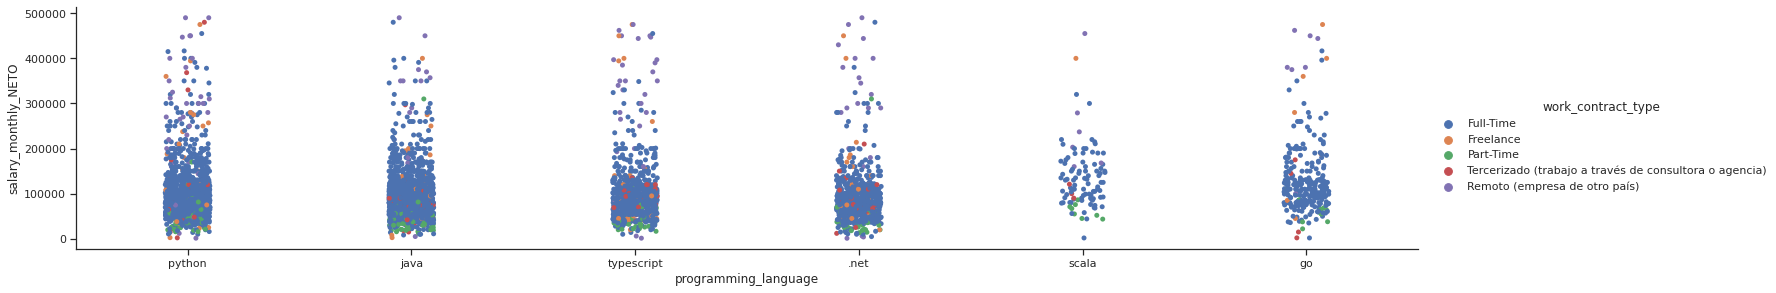

In [12]:



seaborn.catplot(data=filtered_df_lang, y=neto,
                 x='programming_language', height=4,
                 aspect=5,
                hue=contrato)
df_lang[neto].describe()

## grafico de caja

<AxesSubplot:xlabel='programming_language', ylabel='salary_monthly_NETO'>

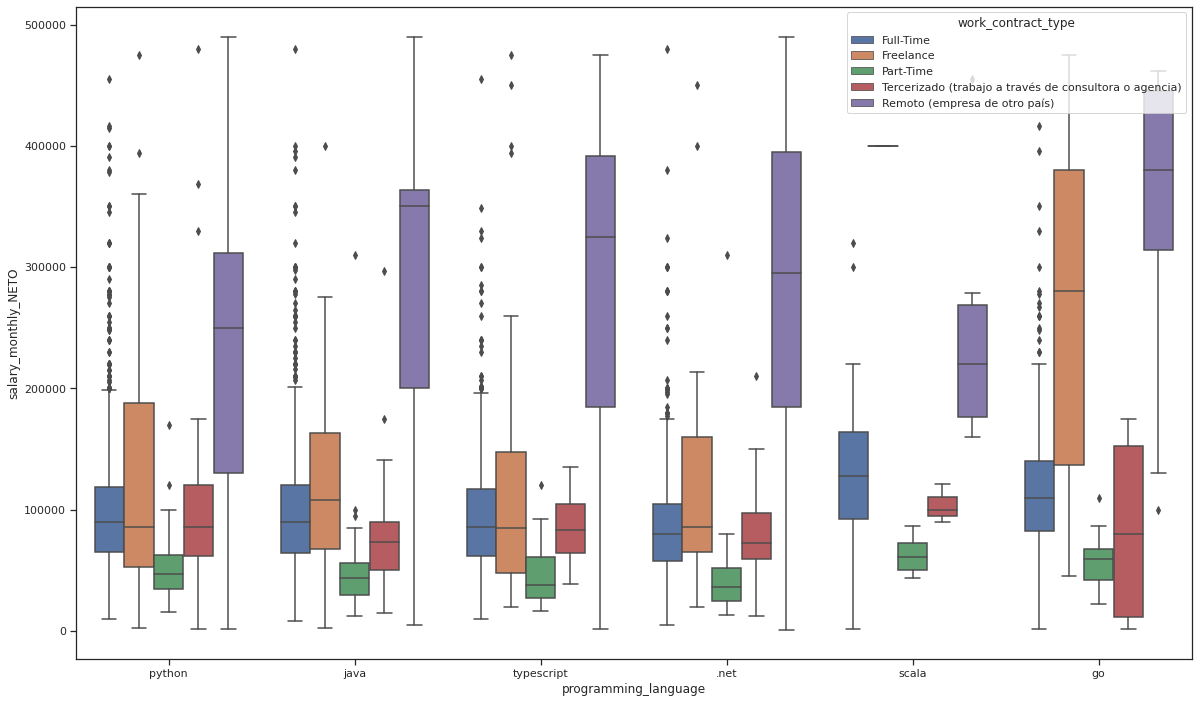

In [13]:
plt.figure(figsize=(20, 12))
seaborn.boxplot(data=filtered_df_lang, x='programming_language', y=neto,
                hue=contrato)

#filtered_df_lang

#plt.ticklabel_format(style='plain', axis='x')

<ipython-input-14-2be9ab29e425>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_lang['salary_is_usd_bool'] = ~filtered_df_lang.salary_in_usd.isna()


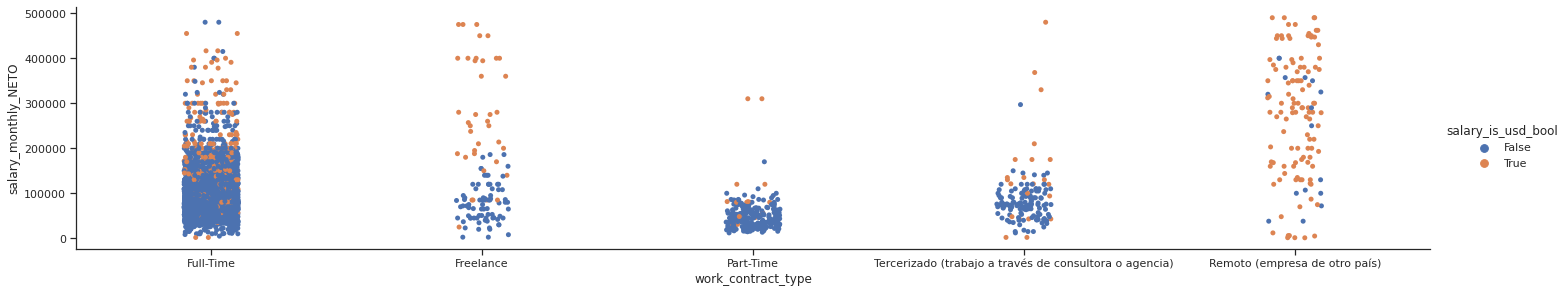

In [14]:
# realizar mismo grafico usando variable 'salary_is_usd_bool' obteniendo asi 2 graficos de caja por lenguaje (uno para salarios en USD y otro ARS)
filtered_df_lang['salary_is_usd_bool'] = ~filtered_df_lang.salary_in_usd.isna()
seaborn.catplot(data=filtered_df_lang, y=neto,
                x='work_contract_type', height=4,
                aspect=5,
                hue='salary_is_usd_bool')

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
